In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ds_historical = pd.read_csv("./data/m_quote.csv", encoding='sjis', header=1)
ds_historical

,Unnamed: 0,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,...,HUF,CZK,PLN,RUB,TRY,IDR(100).1,CNY.1,MYR.1,KRW(100).1,TWD
0,2002/4/30,131.15,189.01,115.97,82.83,79.13,12.73,15.61,15.20,70.24,...,*****,*****,*****,NaN,NaN,1.39,15.84,*****,9.99,3.77
1,2002/5/31,126.44,184.56,115.88,81.58,79.60,12.57,15.59,15.43,69.58,...,*****,*****,*****,NaN,NaN,1.41,15.28,*****,10.10,3.68
2,2002/6/28,123.53,183.00,117.83,80.64,80.09,12.94,15.86,15.92,70.29,...,*****,*****,*****,NaN,NaN,1.44,14.93,*****,10.20,3.66
3,2002/7/31,118.05,183.64,117.23,76.52,80.16,12.67,15.79,15.83,65.42,...,*****,*****,*****,NaN,NaN,1.34,14.26,*****,9.98,3.56
4,2002/8/30,119.08,183.14,116.45,75.85,79.60,12.59,15.69,15.68,64.47,...,*****,*****,*****,NaN,NaN,1.35,14.39,*****,9.97,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2019/11/29,108.90,140.31,120.29,82.26,109.65,11.29,16.10,11.90,74.31,...,0.36,4.71,28.08,1.71,18.97,0.78,*****,26.2,9.32,3.57
212,2019/12/30,109.24,143.05,121.26,82.85,110.95,11.57,16.23,12.08,75.07,...,0.37,4.76,28.37,1.73,18.70,0.78,*****,26.34,9.30,3.61
213,2020/1/31,109.39,142.93,121.35,83.60,112.82,11.50,16.24,12.21,74.95,...,0.36,4.82,28.57,1.77,18.47,0.80,*****,26.83,9.38,3.65
214,2020/2/28,109.99,142.71,119.99,82.82,112.68,11.36,16.06,11.85,73.41,...,0.36,4.79,28.06,1.72,18.17,0.80,*****,26.47,9.21,3.65


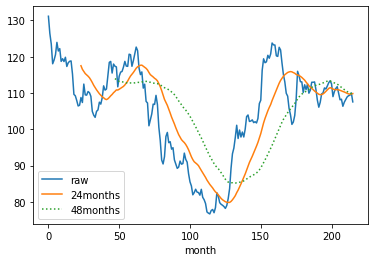

In [16]:
# 移動平均とともにプロットする
ds_historical.USD.plot(label='raw')
ds_historical.USD.rolling(24).mean().plot(linestyle='-', label='24months')
ds_historical.USD.rolling(48).mean().plot(linestyle=':', label='48months')
plt.xlabel("month")
plt.legend()

## 1.6 中心化移動平均(CMA: centered moving average)

In [20]:
df_ice = pd.read_csv("./data/icecream.csv", encoding='sjis', header=1)
df_ice

,年,月,アイスクリーム
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632
...,...,...,...
115,2012,8,1332
116,2012,9,849
117,2012,10,515
118,2012,11,326


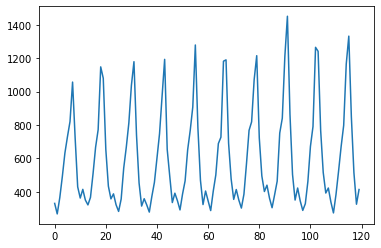

In [22]:
# 月ごとのアイスのプロット
df_ice['アイスクリーム'].plot()

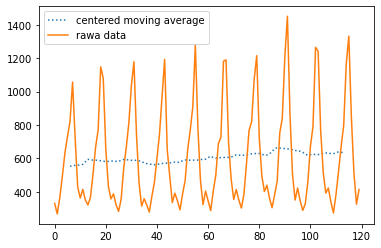

In [24]:
# 中心化移動平均を使う
df_ma = df_ice['アイスクリーム'].rolling(window=12).mean().shift(-6)
df_cma = df_ma.rolling(window=2).mean()

df_cma.plot(label='centered moving average', linestyle=":")
df_ice['アイスクリーム'].plot(label='rawa data')
plt.legend()


## 1.7 季節調整
季節変動の成分を抜いた状態にすること

季節指数の計算

In [28]:
# 原系列(df_ice['アイスクリーム'])/中心化移動平均系列(df_cma)
df_orig_div_cma = df_ice['アイスクリーム']/df_cma

# 月ごとに加算
orig_div_cma = df_orig_div_cma.values
s_index = np.zeros(12)
counter = np.zeros(12, dtype='i')
for idx in range(len(orig_div_cma)//12):
    # 12ヶ月ごとにデータを抽出
    cut_orig_div_cma = orig_div_cma[idx*12:(idx+1)*12]
    mask = cut_orig_div_cma != cut_orig_div_cma
    counter += np.where(mask, 0, 1)
    s_index += np.where(mask, 0, cut_orig_div_cma)

# 加算結果の各月平均
s_index /= counter
# 全体を1200に合わせて季節指数を計算
s_index = s_index / s_index.sum() * 1200

季節調整済み系列を計算する

In [30]:
# 季節指数を原系列の要素と対応させる
# 原系列のスタートが1月なのでnp.tileで12ヶ月分の季節指数を繰り返すだけでよい
tiled_s_index = np.tile(s_index, len(orig_div_cma)//12)

# 季節調整済み系列の計算
df_adjusted_series = df_ice['アイスクリーム'] / tiled_s_index * 100

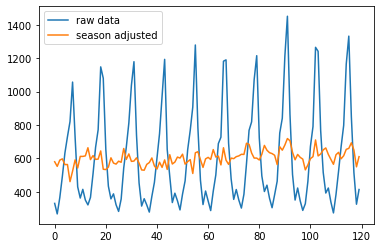

In [31]:
df_ice['アイスクリーム'].plot(label='raw data')
df_adjusted_series.plot(label='season adjusted')

plt.legend()

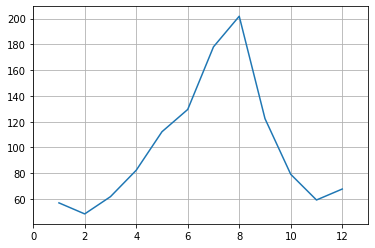

In [35]:
# 季節指数の中身を見てみる

plt.plot(np.arange(1, 13), s_index)
plt.xlim([0, 13])
plt.grid()

In [36]:
# 年間1億円の売上を目標にする場合、各月の売上目標は

10000000 / 1200 * s_index

array([ 475447.88603034,  404113.15670627,  515591.67453831,
        686172.21618252,  935162.11570716, 1079182.16103648,
       1483666.14912336, 1681542.69696515, 1019963.34598289,
        660116.93966424,  494102.735818  ,  564938.9222453 ])

## 1.8 移動平均乖離率

$$
移動平均乖離率 = \frac{(原系列の値 - 移動平均値)}{移動平均値} \ \ \ \times 100
$$

In [37]:
ma24 = ds_historical.USD.rolling(24).mean()
diff_ma24 = (ds_historical.USD - ma24) / ma24 * 100

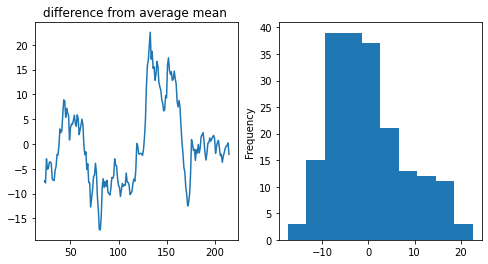

In [42]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
diff_ma24.plot()
plt.title("difference from average mean ")

plt.subplot(1, 2, 2)
diff_ma24.plot.hist()

上記のような平均乖離率の分布をみてみることによって異常値がどこに出てきうるかを確かめることも可能になってくる。

## 1.9 時系列データの基本統計量と前処理

「時系列データが正規分布に従う」という帰無仮説を検定する。  

**Shapiro-Wilk検定** を使用する

Text(0.5, 1.0, 'Histogram of differential series')

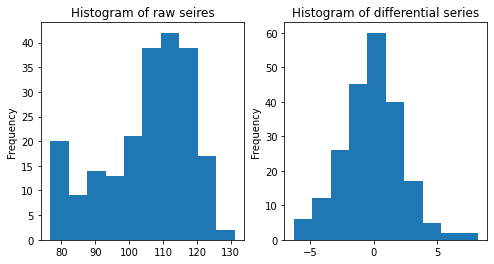

In [43]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
ds_historical.USD.plot.hist()
plt.title("Histogram of raw seires")

plt.subplot(1, 2, 2)
ds_historical.USD.diff().dropna().plot.hist()
plt.title("Histogram of differential series")

In [44]:
import scipy.stats as stats

# 原系列のShapiro-Wilk検定
print(stats.shapiro(ds_historical.USD.values))

# 1次階差系列のShapiro-WIlk検定
print(stats.shapiro(ds_historical.USD.diff().dropna().values))

(0.9271224737167358, 7.2791044303244234e-09)
(0.9890567660331726, 0.10070491582155228)


上記は (W 統計量、 p値) で表示される  

- p値が5%より低い(原系列): 正規分布に従わない
- p値が5%より高い(1次階差): 正規分布に従う

次は自己相関係数をプロットしたコレログラムを見てみる

In [46]:
import io
import requests
import statsmodels.api as sm 

# 月ごとの旅客機の乗客数データ
url = 'https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv'
stream = requests.get(url).content
df_content = pd.read_csv(io.StringIO(stream.decode('utf-8')))
passengers = df_content['#Passengers']

In [47]:
df_content

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [49]:
p_acf = sm.tsa.stattools.acf(passengers)

/Users/oharasoh/study/time_series_analysis/venv/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [50]:
print(p_acf)

[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376 0.48248203 0.51712699
 0.53218983 0.49397569 0.43772134 0.3876029  0.34802503 0.31498388
 0.28849682 0.27080187 0.26429011 0.27679934 0.2985215  0.32558712
 0.3370236  0.30333486 0.25397708 0.21065534 0.17217092]


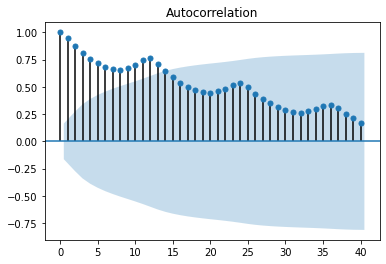

In [52]:
sm.graphics.tsa.plot_acf(passengers, lags=40)  # 最大のラグを40に設定してコレログラムを表示
plt.show()

図中の青色の枠は95%の信頼区間を示している  

ラグ１の推移関係がラグ2,3,4..と受け継がれている可能性があるのでその影響を排除する

**偏自己相関** を使う

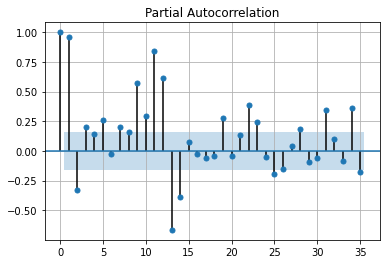

In [58]:
sm.graphics.tsa.plot_pacf(passengers, lags=35, method='ols')# 最大のラグを40に設定してコレログラムを表示
plt.grid()
plt.show()
